## Df + Lib

In [26]:
%store -r merge_unique_df

In [27]:
# essential
import pandas as pd
import matplotlib.pyplot as plt

# for NN
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

#basics 
# essential
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# in order to obtain the True/False for each genre
onehot_enc=pd.get_dummies(merge_unique_df['maingenere'],prefix='genre')
onehot_enc.head(2)

,genre_blues,genre_country,genre_dance,genre_disco,genre_folk,genre_funk,genre_house,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [29]:
# Conversione in valori binari (0 o 1) per rappresentare il main genere con 1 e gli altri con 0
one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\823651478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)


In [30]:
# we merge the 2 df
df_one_hot=pd.concat([merge_unique_df,one_hot_enc_binary],axis=1)
df_one_hot.head(2)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0


## U1 - Test ONE HOT

In [31]:
mask_u1=df_one_hot['User']==1
u1_onehot_df=df_one_hot[mask_u1]
u1_onehot_df.shape

(4669, 38)

### NN - test ONE HOT

In [32]:
# FIRST WE NEED TO DEFINE THE FEATURES
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

In [33]:
# DEFINITION OF TARGET AND FEATURES

x=u1_onehot_df[total_features]

y=u1_onehot_df[target]

In [34]:
# first we have to standardize
scaler=StandardScaler()
x[numerical_features]=scaler.fit_transform(x[numerical_features])

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\3500654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features]=scaler.fit_transform(x[numerical_features])


In [35]:
#TRAIN/TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model_onehot=Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='relu')
])

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model_onehot.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [38]:
history_onehot=model_onehot.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2025 - mae: 0.3689 - val_loss: 0.0620 - val_mae: 0.2014
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0523 - mae: 0.1853 - val_loss: 0.0406 - val_mae: 0.1629
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367 - mae: 0.1530 - val_loss: 0.0344 - val_mae: 0.1489
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0320 - mae: 0.1433 - val_loss: 0.0322 - val_mae: 0.1432
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0286 - mae: 0.1353 - val_loss: 0.0311 - val_mae: 0.1407
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - mae: 0.1356 - val_loss: 0.0306 - val_mae: 0.1397
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 - mae: 0.1304 - val_loss: 0.0300 - val_mae: 0.1377
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - mae: 0.1294 - val_loss: 0.0299 - val_mae: 0.1373
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241 - mae: 

In [39]:
loss, mae = model_onehot.evaluate(x_test, y_test)
print(f'Loss: {loss}, MAE: {mae}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.0266 - mae: 0.1289
Loss: 0.02758893370628357, MAE: 0.13086740672588348


WE CAN SEE THAT sice LOSS is our MSE=0.0278 

when we use the simple NN our MSE is equal 0.0304

so seams that we have a reduction

we have also a reduction with respect with the cross validation 0.033

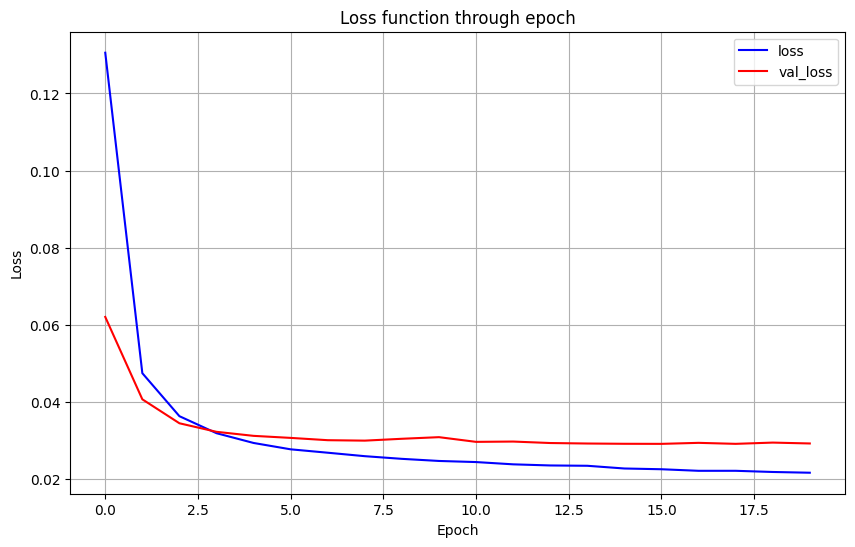

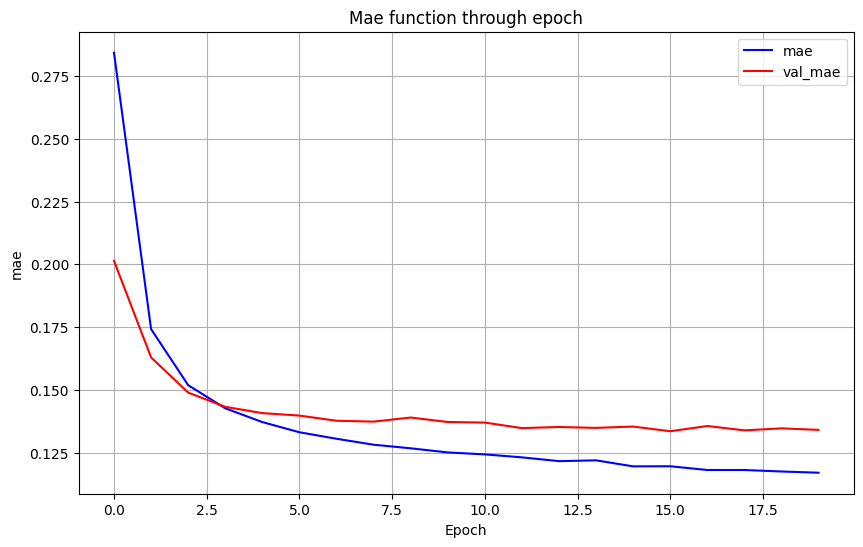

In [40]:
#SOME PLOT

#plot loss
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['loss'],color='blue',label='loss')
plt.plot(history_onehot.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

    #plot mean
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['mae'],color='blue',label='mae')
plt.plot(history_onehot.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()   

## GENERALIZE ONE HOT - ENCODING - all users

In [41]:
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

### DEFINE FUNCTIONS

In [42]:
####################
### CREATE MODEL ###
####################


# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i

#################
### FIT MODEL ###
#################

#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )

    return history_model

############
### PLOT ###
############

def plot_for_model(history, y_hat, x_test):

    #plot loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure(figsize=(10,6))
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot 
    # aggiunto A.L
    plt.figure(figsize=(12,6))
    plt.plot(y_test, color='r')
    plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    plt.title('Prediction')
    plt.legend()
    plt.show()

### MAIN 

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8906 - mae: 0.7368 - val_loss: 0.0639 - val_mae: 0.2029
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0556 - mae: 0.1888 - val_loss: 0.0453 - val_mae: 0.1706
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0428 - mae: 0.1665 - val_loss: 0.0396 - val_mae: 0.1595
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0374 - val_mae: 0.1557
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0339 - mae: 0.1481 - val_loss: 0.0364 - val_mae: 0.1525
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0320 - mae: 0.1430 - val_loss: 0.0346 - val_mae: 0.1494
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0300 - mae: 0.1387 - val_loss: 0.0338 - val_mae: 0.1473
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0299 - mae: 0.1381 - val_loss: 0.0342 - val_mae: 0.1484
Epoch 9/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0288 

,Song,Performer,valence
SongID,,,
...Baby One More TimeBritney Spears,...Baby One More Time,Britney Spears,0.907
(Call Me Your) Anything ManBobby Moore,(Call Me Your) Anything Man,Bobby Moore,0.760
(I Know) I'm Losing YouThe Temptations,(I Know) I'm Losing You,The Temptations,0.813
(I Wanna) TestifyThe Parliaments,(I Wanna) Testify,The Parliaments,0.754
(If You Want It) Do It YourselfGloria Gaynor,(If You Want It) Do It Yourself,Gloria Gaynor,0.729
...,...,...,...
"Don't Try To Lay No Boogie Woogie On The ""King Of Rock & Roll""CROW","Don't Try To Lay No Boogie Woogie On The ""King...",CROW,0.840
Don't Want To Live Without ItPablo Cruise,Don't Want To Live Without It,Pablo Cruise,0.892
Don't WorryMarty Robbins,Don't Worry,Marty Robbins,0.435


-----------------------------------------------------
---------------------------------------------------------
USER 0


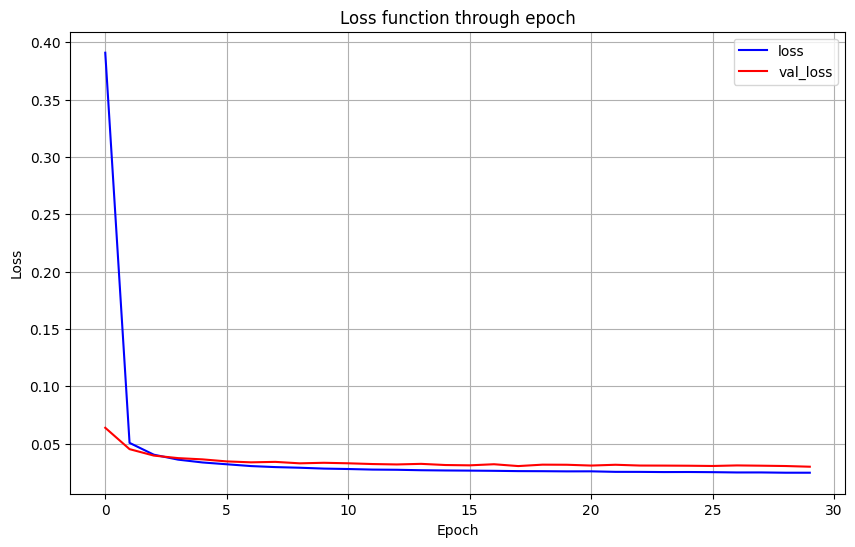

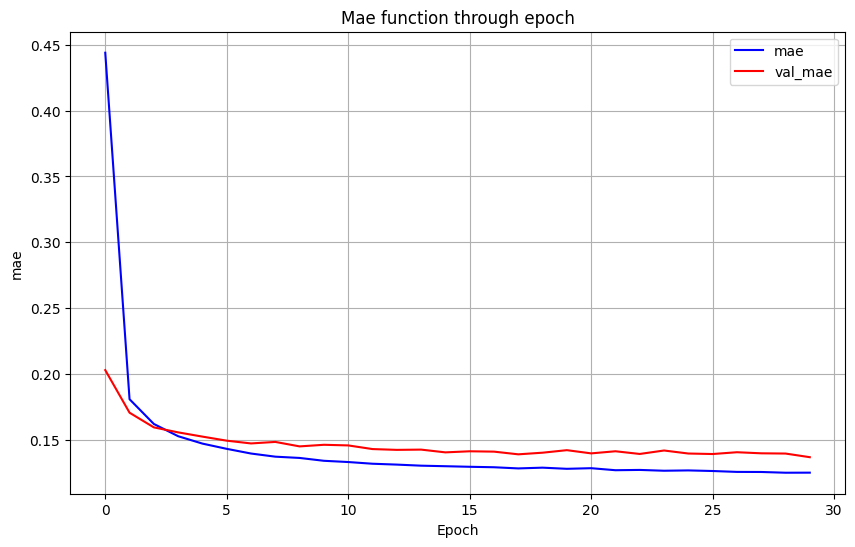

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


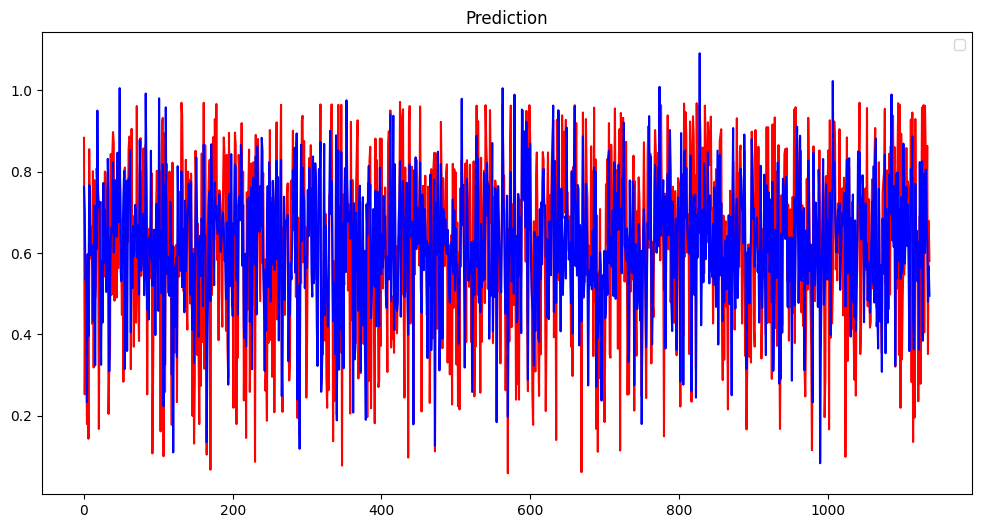

MSE


0.029949354523615735

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6233 - mae: 0.6193 - val_loss: 0.0888 - val_mae: 0.2315
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0675 - mae: 0.2041 - val_loss: 0.0607 - val_mae: 0.1919
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0502 - mae: 0.1777 - val_loss: 0.0516 - val_mae: 0.1775
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421 - mae: 0.1629 - val_loss: 0.0453 - val_mae: 0.1667
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 - mae: 0.1492 - val_loss: 0.0410 - val_mae: 0.1600
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319 - mae: 0.1420 - val_loss: 0.0388 - val_mae: 0.1554
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0322 - mae: 0.1437 - val_loss: 0.0370 - val_mae: 0.1513
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 - mae: 0.1371 - val_loss: 0.0366 - val_mae: 0.1500
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293 

,Song,Performer,valence
SongID,,,
'65 Love AffairPaul Davis,'65 Love Affair,Paul Davis,0.952
'Til My Baby Comes HomeLuther Vandross,'Til My Baby Comes Home,Luther Vandross,0.802
'Tis The Damn SeasonTaylor Swift,'Tis The Damn Season,Taylor Swift,0.348
('til) I Kissed YouThe Everly Brothers,('til) I Kissed You,The Everly Brothers,0.701
(I Wanna) Love My Life AwayGene Pitney,(I Wanna) Love My Life Away,Gene Pitney,0.924
...,...,...,...
Don't Forget I Love YouThe Butanes,Don't Forget I Love You,The Butanes,0.852
Don't Go Near The IndiansRex Allen,Don't Go Near The Indians,Rex Allen,0.743
Don't Know What You Got (Till It's Gone)Cinderella,Don't Know What You Got (Till It's Gone),Cinderella,0.232


-----------------------------------------------------
---------------------------------------------------------
USER 1


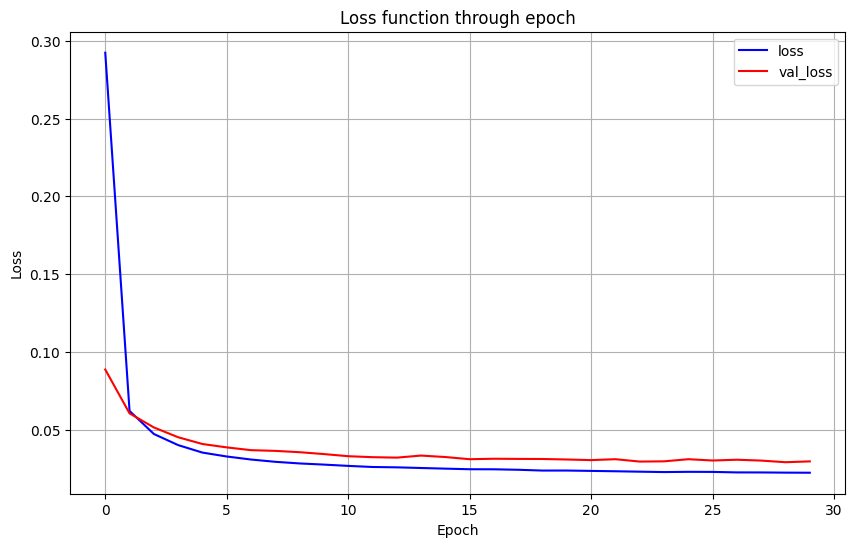

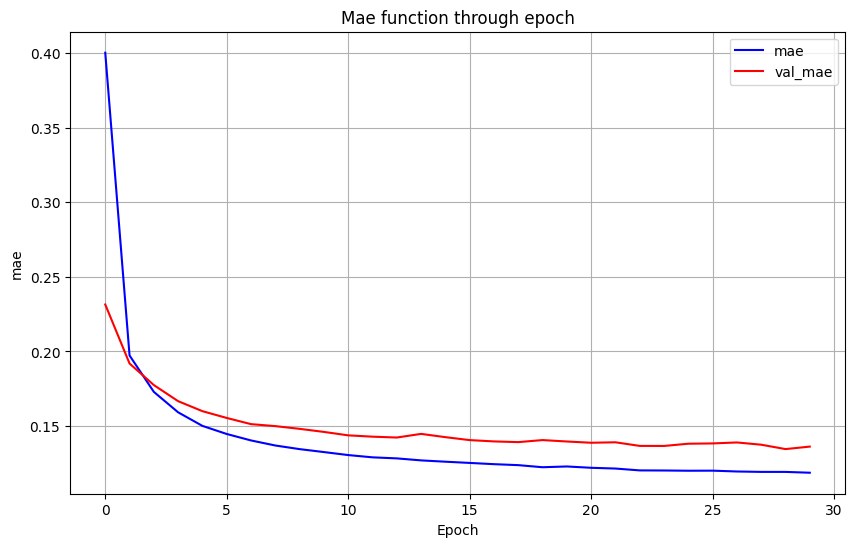

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


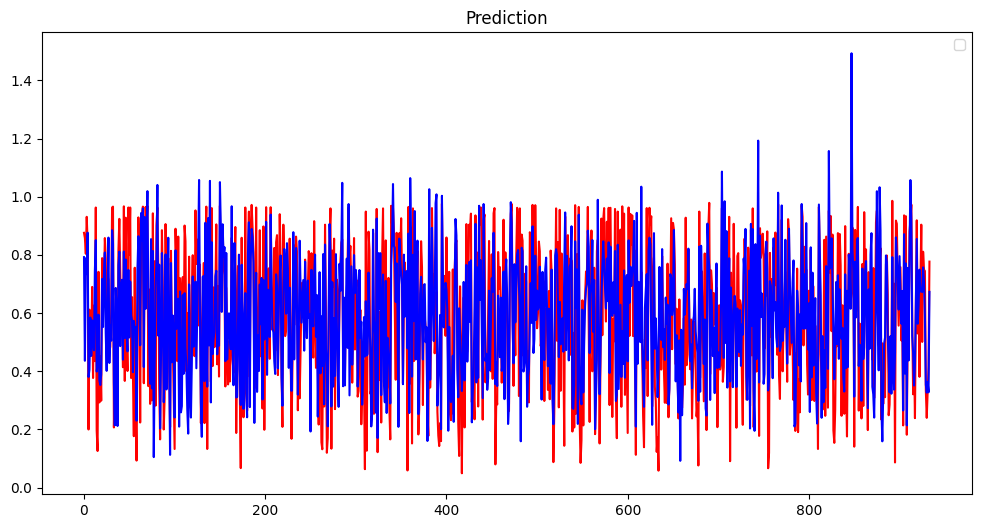

MSE


0.02981955645874003

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1290 - mae: 0.2427 - val_loss: 0.0308 - val_mae: 0.1214
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0276 - mae: 0.1145 - val_loss: 0.0246 - val_mae: 0.1059
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0231 - mae: 0.1042 - val_loss: 0.0230 - val_mae: 0.1073
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211 - mae: 0.1008 - val_loss: 0.0212 - val_mae: 0.0987
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - mae: 0.0982 - val_loss: 0.0202 - val_mae: 0.0991
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 - mae: 0.0914 - val_loss: 0.0204 - val_mae: 0.0965
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0179 - mae: 0.0902 - val_loss: 0.0202 - val_mae: 0.0981
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0178 - mae: 0.0925 - val_loss: 0.0194 - val_mae: 0.0945
Epoch 9/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0172 

,Song,Performer,valence
SongID,,,
(1-2-3-4-5-6-7) Count The DaysInez & Charlie Foxx,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,0.630
(All Of A Sudden) My Heart SingsMel Carter,(All Of A Sudden) My Heart Sings,Mel Carter,0.504
(Believed You Were) Lucky'Til Tuesday,(Believed You Were) Lucky,'Til Tuesday,0.495
(Between A) Rock And A Hard PlaceCutting Crew,(Between A) Rock And A Hard Place,Cutting Crew,0.585
(Bringing Out) The Girl In MeMaxine Nightingale,(Bringing Out) The Girl In Me,Maxine Nightingale,0.953
...,...,...,...
Don't Answer The Door - Part 1B.B. King,Don't Answer The Door - Part 1,B.B. King,0.740
Don't Be A Drop-OutJames Brown And The Famous Flames,Don't Be A Drop-Out,James Brown And The Famous Flames,0.690
Don't Be Stupid (You Know I Love You)Shania Twain,Don't Be Stupid (You Know I Love You),Shania Twain,0.903


-----------------------------------------------------
---------------------------------------------------------
USER 2


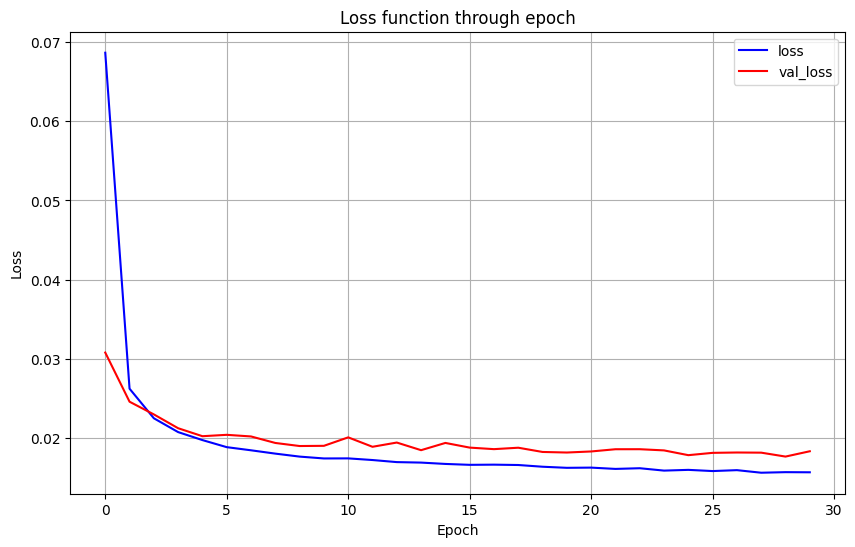

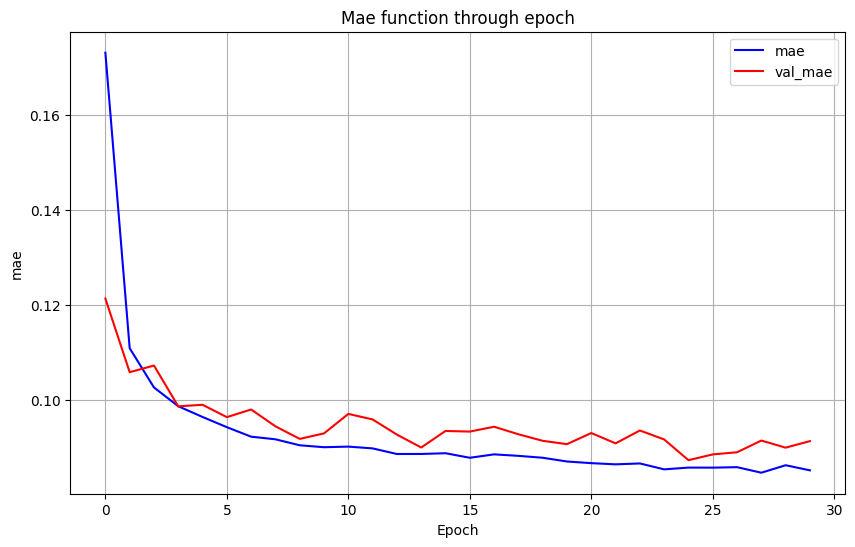

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


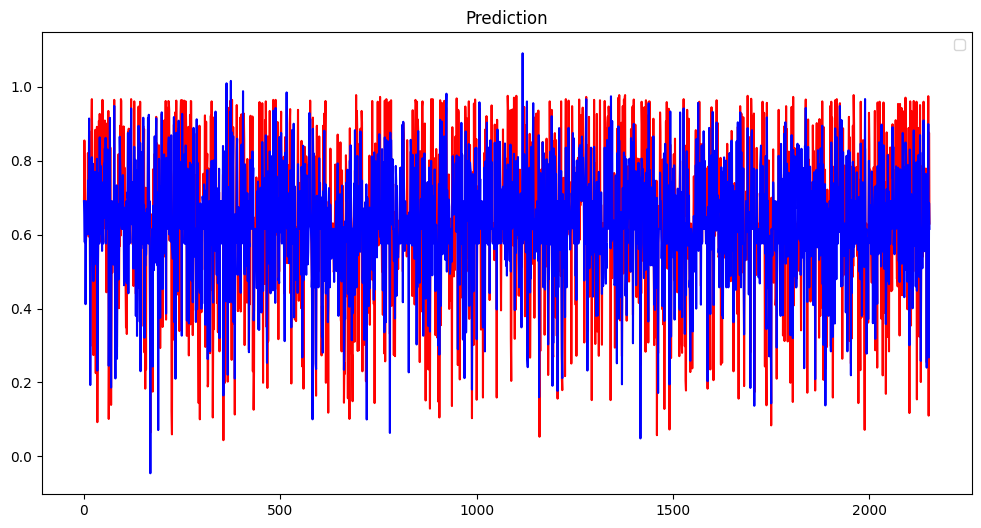

MSE


0.0183269346730702

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1877 - mae: 0.3355 - val_loss: 0.0591 - val_mae: 0.1824
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0478 - mae: 0.1696 - val_loss: 0.0407 - val_mae: 0.1581
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - mae: 0.1483 - val_loss: 0.0335 - val_mae: 0.1469
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - mae: 0.1420 - val_loss: 0.0320 - val_mae: 0.1436
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - mae: 0.1340 - val_loss: 0.0301 - val_mae: 0.1393
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268 - mae: 0.1296 - val_loss: 0.0298 - val_mae: 0.1399
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - mae: 0.1305 - val_loss: 0.0288 - val_mae: 0.1363
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mae: 0.1277 - val_loss: 0.0283 - val_mae: 0.1350
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249 - mae: 0.1260 - va

,Song,Performer,valence
SongID,,,
......And Roses And RosesAndy Williams,......And Roses And Roses,Andy Williams,0.150
(Forever) Live And DieOrchestral Manoeuvres In The Dark,(Forever) Live And Die,Orchestral Manoeuvres In The Dark,0.865
(Lay Your Head On My) PillowTony Toni Tone,(Lay Your Head On My) Pillow,Tony Toni Tone,0.514
(Love Me) Love The Life I LeadThe Fantastics,(Love Me) Love The Life I Lead,The Fantastics,0.784
(The System Of) Doctor Tarr And Professor FetherThe Alan Parsons Project,(The System Of) Doctor Tarr And Professor Fether,The Alan Parsons Project,0.653
...,...,...,...
Doll HouseDonnie Brooks,Doll House,Donnie Brooks,0.703
Don't Ask Me How I KnowBobby Pinson,Don't Ask Me How I Know,Bobby Pinson,0.472
Don't Come Out The HouseMetro Boomin Featuring 21 Savage,Don't Come Out The House,Metro Boomin Featuring 21 Savage,0.175


-----------------------------------------------------
---------------------------------------------------------
USER 3


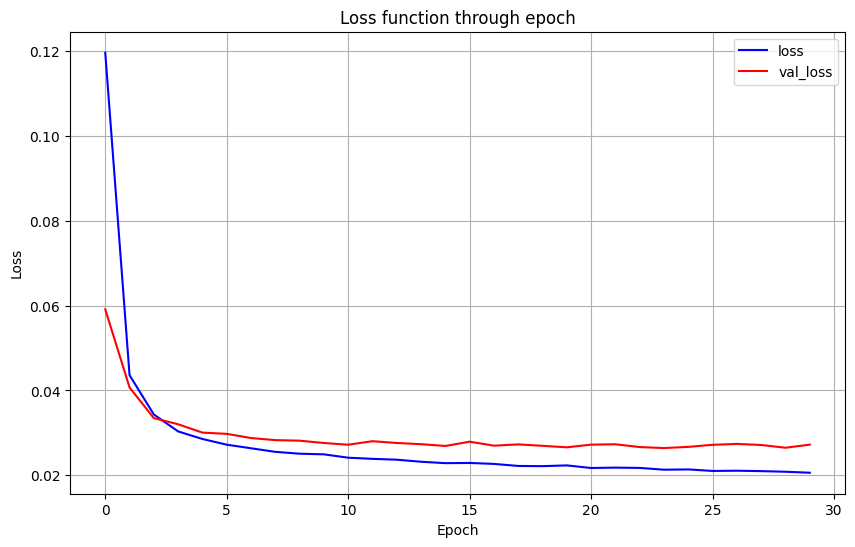

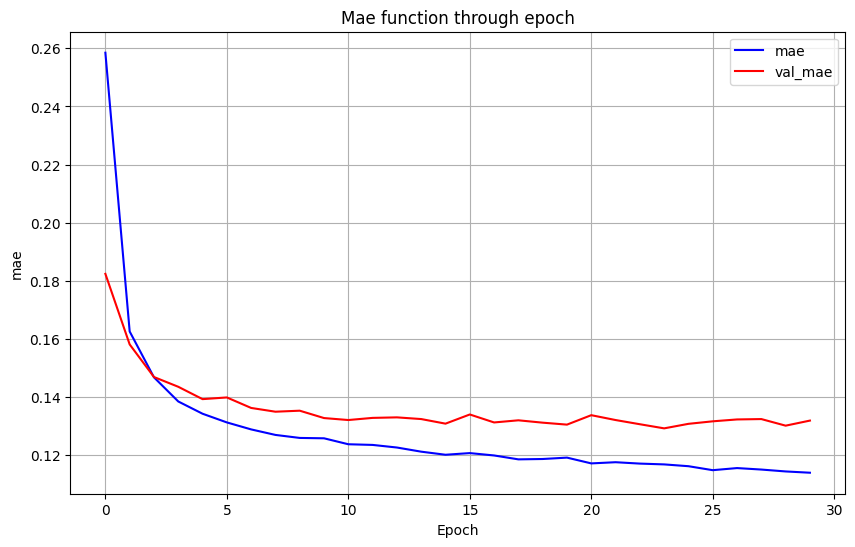

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


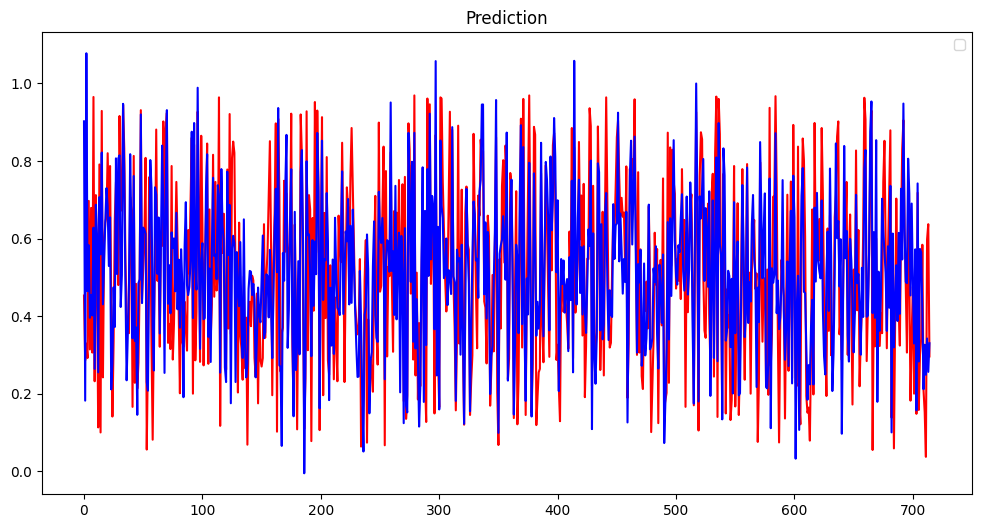

MSE


0.0272188616666496

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3889 - mae: 0.4664 - val_loss: 0.1003 - val_mae: 0.2406
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0797 - mae: 0.2162 - val_loss: 0.0624 - val_mae: 0.1943
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0519 - mae: 0.1776 - val_loss: 0.0514 - val_mae: 0.1787
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0418 - mae: 0.1618 - val_loss: 0.0482 - val_mae: 0.1725
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0384 - mae: 0.1555 - val_loss: 0.0459 - val_mae: 0.1676
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357 - mae: 0.1503 - val_loss: 0.0410 - val_mae: 0.1608
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0327 - mae: 0.1430 - val_loss: 0.0402 - val_mae: 0.1598
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mae: 0.1367 - val_loss: 0.0393 - val_mae: 0.1578
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - mae: 

,Song,Performer,valence
SongID,,,
(if You Add) All The Love In The WorldMac Davis,(if You Add) All The Love In The World,Mac Davis,0.359
(The Bees Are For The Birds) The Birds Are For The BeesThe Newbeats,(The Bees Are For The Birds) The Birds Are For...,The Newbeats,0.913
24'sT.I.,24's,T.I.,0.582
33Polo G,33,Polo G,0.117
4th DimensionKIDS SEE GHOSTS Featuring Louis Prima,4th Dimension,KIDS SEE GHOSTS Featuring Louis Prima,0.734
...,...,...,...
Don't Do ItThe Band,Don't Do It,The Band,0.775
Don't Go AwayFun Factory,Don't Go Away,Fun Factory,0.586
Don't Happen TwiceKenny Chesney,Don't Happen Twice,Kenny Chesney,0.617


-----------------------------------------------------
---------------------------------------------------------
USER 4


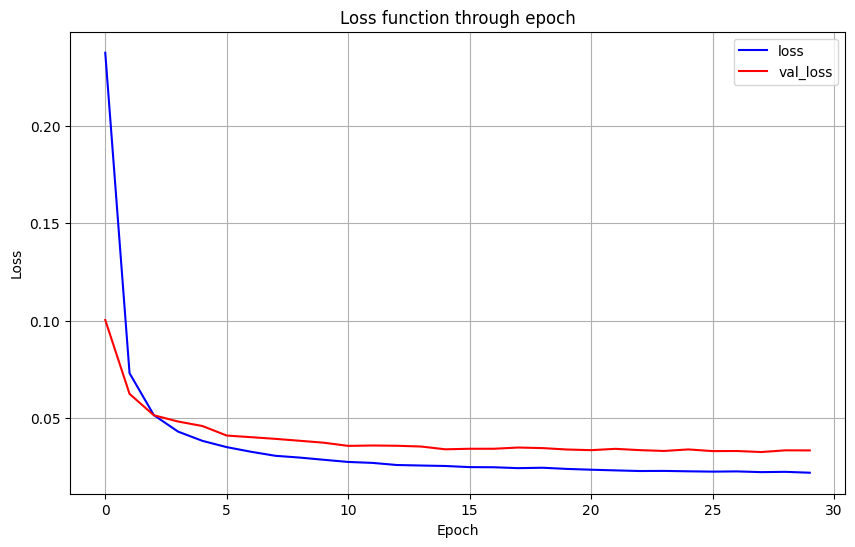

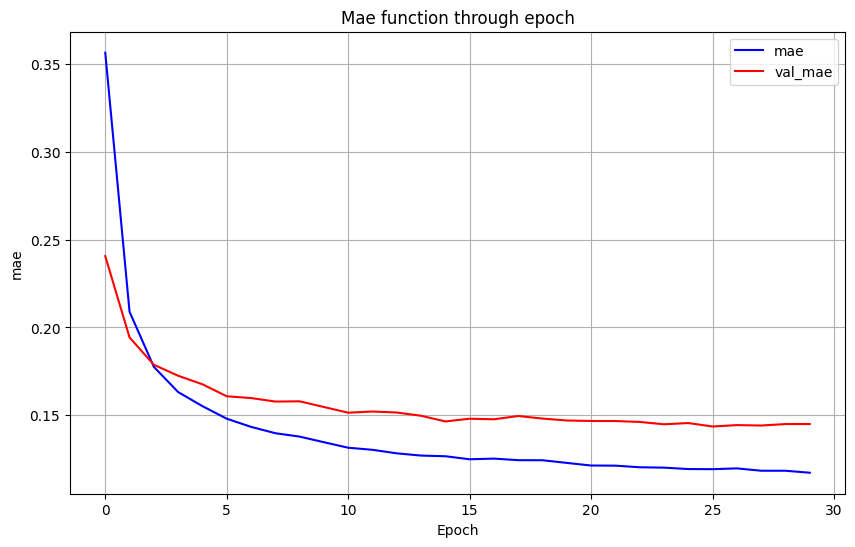

C:\Users\lovoa\AppData\Local\Temp\ipykernel_1704\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


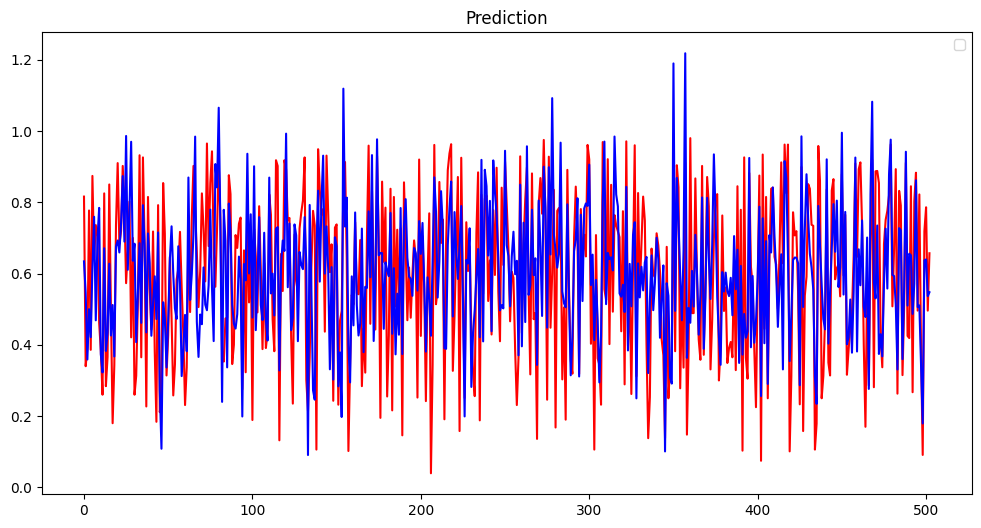

MSE


0.03339794136429044

In [43]:
dizio_model_user = {} #in this dizio we store the model for each user

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#loop creation user and model
for i in range(0, len(df_one_hot['User'].unique())): #i indica lo user   

    #select user
    mask_user = df_one_hot['User'] == i
    #display(mask_user)
    user_i_df = df_one_hot[mask_user]
    #display(user_i_df) 

    #extract the feature and target
    x = user_i_df[total_features]
    y = user_i_df[target]

    #normalization
    x_scaled = StandardScaler().fit_transform(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
    #display(x_train)

    #conversion
    y_train=np.array(y_train)
    y_test=np.array(y_test)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''

    # AGGIUNTO A.L.
    #y_hat=model_user_i.predict(x_train)
    y_hat = model_user_i.predict(x_test)

    ###################################
    ###################################
    # AGGIUNTO A.L. --> RECOMANDATION #
    ###################################
    ###################################

    #in order to have indices match between y_hat and x_test
    x_test_indices=user_i_df.iloc[np.arange(len(y_hat))].index
    # Threshold for raccommendations --> valence > 0.7
    reccomended_songs=user_i_df.loc[x_test_indices][y_hat.flatten()>0.7] # filtet songs with valence > 0.7

    # in order to visualize reccomandation
    print(f'\nReccomendations for User{i}:')
    if reccomended_songs.empty:
        print('No songs recommended based on valence threshold')
    else:
        display(reccomended_songs[['Song','Performer','valence']])

    # Now we want to save recommendation in dictionary
    reccomandations_songs_per_user['User{i}']=reccomended_songs

    #QUALCOSA NON QUADRA --> AGGIUNGE AL DIZIONARIO ANCHE CANZONI CON VALENCE > 0.7

    print('-----------------------------------------------------')

    #plot the metrics of the model
    print('---------------------------------------------------------')
    print(f'USER {i}')
    plot_for_model(history_model_user_i, y_hat, x_test)

    #compute MSE
    print('MSE')
    mse = mean_squared_error(y_test, y_hat)
    display(mse)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomended_songs} 


## CONCLUSION 

Creare una tabella dove compariamo ONE HOT e NN normale

Ho fatto un file con tutti i risultati a confronto 